In [1]:

import cv2 as cv
import sys
img = cv.imread("my_plot.png" )

if img is None:
    sys.exit("could not read the image")

cv.namedWindow('display window',cv.WINDOW_NORMAL)
cv.imshow("display window",img)
k = cv.waitKey(0)
cv.destroyAllWindows()

if k == ord("s"):
    cv.imwrite("my_cvplot.jpg",img)

下面的代码程序将加载并显示为灰度图像，按's'则保存图像并退出，按'ESC'键直接退出且不保存。

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread("my_plot.png",0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27: #wait for esc key to exit
    cv.destroyAllWindows()
elif k == ord('s'):
    cv.imwrite('my_cv_plot.png',img)
    cv.destroyAllWindows()

用摄像头捕获视频
通常，我们需要用摄像头来捕获直播画面，OpenCV为此提供了一些非常简单的函数接口。下面我们来尝试用摄像头来捕获视频画面（我使用的是电脑的内置摄像头）并将画面转化成灰度图像显示，这项操作很简单。 如果要捕获视频，首先要做的是创建一个VideoCapture对象，它的参数可以是设备索引或者是视频文件的名称。设备索引就是指设备所对应的设备号，当只连接一个摄像头，参数只需传递0（或-1） 。你可以传递参数1来选择你连接的第二个摄像头等等。接下来，你需要逐帧捕获并显示并不要忘记关闭捕获。

In [9]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
while(True):
    # capture frame by frame
    ret , frame = cap.read()
    #our opretions on the frame come here 
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    #display the resulting 
    cv.imshow('frame',gray)
    # if cv.waitKey(0):
    #     break
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
#when everything done,release the capture
cap.release()
cv.destroyAllWindows()

目标：
用OpenCV绘制图形
掌握函数：cv.line(), cv.circle() , cv.rectangle(), cv.ellipse(), cv.putText()  
代码
上述函数的参数： 
- img：用于设置图像
 - color：用于设置颜色。是一个RGR值，将用元组传递，例如：（255,0,0）为蓝色。对于灰度图像，只需传递标量值。 
 - thickness：用于设置线条或圆形等的厚度。如果是- 1则在图案内生成闭合图案并填充颜色。这个参数的默认厚度为1。
  - lineType：用于设置线条的类型，有8型连接，抗锯齿等。默认情况是8型连接。cv2.LINE_AA为抗锯齿，这样看起来会非常平滑。

绘制直线
要绘制线条，你需要设置起点和终点坐标。我们将创建一个黑色图像，并在其上从左上角到右下角绘制一条蓝线。 

In [2]:
import numpy as np
import cv2 as cv
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
#要绘制矩形，你需要设置矩形的左上角和右下角的坐标。这次我们将在图像的右上角绘制一个绿色矩形。 
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
#要绘制圆形，你需要设置其圆点坐标和半径，我们将在上面绘制的矩形内绘制一个圆。 
cv.circle(img,(447,63), 63, (0,0,255), -1)
#要绘制椭圆，我们需要传递几个参数，一个参数是椭圆中心位置（x，y），下一个是长轴长度和断轴长度（a，b），角度是椭圆在逆时针方向上的旋转角度，
# startAngle和endAngle表示从主轴顺时针方向测量的椭圆弧的起点和终点，即给出值0和360给出完整的椭圆，给出值180则画出半个椭圆。
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
#要绘制多边形，首先需要顶点坐标。 将这些点转换为ROWSx1x2的数组，其中ROWS是顶点数，它应该是int32类型。在这里，我们绘制一个带有四个黄色顶点的小多边形。 
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))

'''
要将文本放入图像中，你需要传递以下几个参数： - 要写入的文本数据， - 要放置的位置（即文本数据的左下角） - 字体类型（检查cv.putText（）文档以获取支持的字体），
 - 字体大小 - 常规的参数，比如颜色、粗细、线型等，为了更好看，建议使用lineType = cv.LINE_AA作为线型参数的值。
'''
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
cv.imshow("display window",img)
cv.waitKey()
cv.destroyAllWindows()

这里我们来创建一个简单的程序，他会在图片上你双击的位置绘制一个圆圈。首先我们来创建一个鼠标事件回调函数，鼠标事件发生是他就会被执行。鼠标事件可以是鼠标上的任何动作，比如左键按下，左键松开，左键双击等。我们可以通过鼠标事件获得与鼠标对应的图片上的坐标。根据这些信息我们可以做任何我们想做的事。你可以通过执行下列代码查看所有被支持的鼠标事件：

In [1]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [3]:
import numpy as np
import cv2 as cv

#mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)

#create a black image,a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

现在我们来创建一个更好的程序。这次我们的程序要完成的任务是根据我们选择的模式在拖动鼠标时绘制矩形或者是圆圈（就像画图程序中一样）。所以我们的回调函数包含两部分，一部分画矩形，一部分画圆圈。这是一个典型的例子他可以帮助我们更好理解与构建人机交互式程序，比如物体跟踪，图像分割等

In [9]:
import numpy as np
import cv2 as cv

drawing = False #true if mouse is pressed
mode = True #if True,draw rectangle.Press 'm' to toggle to curve
ix,iy = -1,-1

#mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else: 
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
        #接下来，我们必```须将此鼠标回调函数绑定到OpenCV窗口。在主循环中，我们应该把按键'm'设置为切换绘制矩形还是圆形。 参考以下代码：


img = np.zeros((512,512,3),np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k ==27:
        break
cv.destroyAllWindows()
    

目标：
学习把滑动条绑定到OpenCV窗口中
学习以下函数：cv.getTrackbarPos(), cv.createTrackbar()

在这里，我们将创建一个简单的应用程序，完成显示指定的颜色。你有一个显示颜色的窗口和三个滑动条，分别用于指定B，G，R各颜色。你可以去拖动滑动条上的按钮去更改窗口所显示的颜色。默认情况下，初始颜色将设置为黑色。 对于cv.getTrackbarPos()函数，第一个参数是滑动条名称，第二个参数是它所附加的窗口名称，第三个参数是默认值，第四个参数是最大值，第五个参数是执行的回调函数每次轨迹栏值都会发生变化。回调函数始终具有默认参数，即滑动条位置。在我们的例子中，函数什么都不做，所以我们简单地跳过。 轨迹栏的另一个重要应用是将其用作按钮或开关。默认情况下，OpenCV没有按钮功能。因此，你可以使用滑动条来获得此类功能。在我们的应用程序中，我们创建了一个开关，其中应用程序仅在开关打开时有效，否则屏幕始终为黑色。 参考一下代码：

In [ ]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

#create a black image,a window
img = np.zeros((300,512,3),np.uint8)
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1)&0xFF
    if k == 27:
        break
         # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv.destroyAllWindows()

Goal
Learn to:

Access pixel values and modify them
Access image properties
Set a Region of Interest (ROI)
Split and merge images

In [5]:
import numpy as np
import cv2 as cv

img = cv.imread('bubu.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
px = img[100,100]
print(px)
blue = img[100,100,0]
print(blue)
green = img[100,100,1]
print(green)
img[100,100] = [255,255,255]
print(img[100,100])


[252 254 254]
252
254
[255 255 255]


Better pixel accessing and editing method :

In [10]:
# accessing RED value
img.item(10,10,2)

#modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)
print(img.shape)
#Total number of pixels is accessed by img.size:
print(img.size)
print(img.dtype)


(932, 1036, 3)
2896656
uint8


In [14]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
img[:,:,2] = 0
cv.imshow("display window",img)
cv.waitKey()
cv.destroyAllWindows()

Making Borders for Images (Padding)
If you want to create a border around an image, something like a photo frame, you can use cv.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

src - input image
top, bottom, left, right - border width in number of pixels in corresponding directions
borderType - Flag defining what kind of border to be added. It can be following types:
cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
value - Color of border if border type is cv.BORDER_CONSTANT

(<Axes: title={'center': 'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

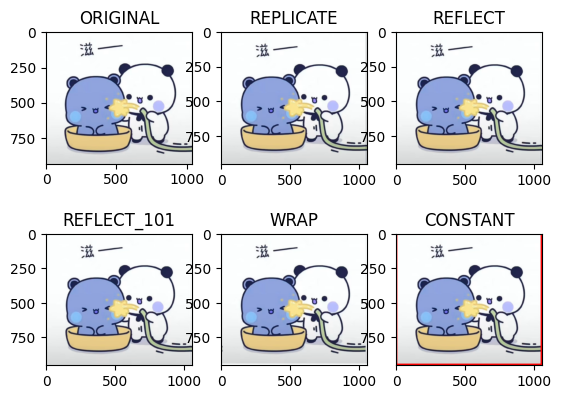

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 

BLUE = [255,0,0]
img1 =  cv.imread('bubu.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')


Goal
In this tutorial, you will learn how to convert images from one color-space to another, like BGR ↔ Gray, BGR ↔ HSV, etc.
In addition to that, we will create an application to extract a colored object in a video
You will learn the following functions: cv.cvtColor(), cv.inRange(), etc.

目标：
学习对图像的几种运算，如加法、减法、按位运算等
学习以下函数： cv.add(), cv.addWeighted()

图像的加法
你可以使用OpenCV的cv.add()函数把两幅图像相加，或者可以简单地通过numpy操作添加两个图像，如res = img1 + img2。两个图像应该具有相同的大小和类型，或者第二个图像可以是标量值。

注意：OpenCV加法和Numpy加法之间存在差异。OpenCV的加法是饱和操作，而Numpy添加是模运算。

In [3]:
import numpy as np
import cv2 as cv
x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y))
print(x+y)
#这种差别在你对两幅图像进行加法时会更加明显。OpenCV 的结果会更好一点。所以我们尽量使用 OpenCV 中的函数。


[[255]]
[4]


图像的混合

In [14]:
img1 = cv.imread('bubu.jpg')
height,width,channels = img1.shape

img2 = cv.imread('my_plot.png')
img2_resized = cv.resize(img2,(width,height))


dst= cv.addWeighted(img1,0.7,img2_resized,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

图像按位操作
这里包括的按位操作有：AND，OR，NOT，XOR 等。当我们提取图像的一部分，选择非矩形ROI时这些操作会很有用（你会在后续章节中看到）。

我想把OpenCV的标志放到另一幅图像上。如果我使用图像的加法，图像的颜色会改变，如果使用图像的混合，会得到一个透明的效果，但是我不希望它透明。如果它是矩形我可以像上一章那样使用ROI。但是OpenCV标志不是矩形。所以我们可以通过下面的按位运算实现：

In [24]:
img1= cv.imread('westbrook.jpg')
img2 = cv.imread('dclogo.png')
#i want to put logo on top-left corner ,So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]
#now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret,mask = cv.threshold(img2gray ,10, 255,cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)


# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

目标：
在图像处理中，由于每秒需要处理大量操作，因此处理图像的代码必须不仅要能给出正确的结果，同时还必须要快。所以在本小节中，学习： - 衡量代码的性能。 - 一些优化代码性能的技巧 - 学习以下函数：cv.getTickCount, cv.getTickFrequency

除了OpenCV库之外，Python还提供了一个time模块，有助于测量执行时间。另一个profile模块可以获得有关代码的详细报告，例如代码中每个函数所花费的时间，调用函数的次数等。如果你使用的是IPython，所有这些功能都以一个有好的方式整合到一起。

In [ ]:
e1 = cv.getTickCount()

e2 = cv.getTickCount()
time = (e2 - e1)/cv.getTickFrequency

In [27]:
img1 = cv.imread('westbrook.jpg')

e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

0.3364246


In [28]:
import time
t1 = time.time()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
t2 = time.time()
t = t2 -t1
print(t)


0.2843337059020996


In [29]:
cv.useOptimized()

True

注意：通常，OpenCV函数比Numpy函数更快。因此对于相同的操作，OpenCV功能是首选。但是可能也有例外，尤其是当使用Numpy对视图而不是复制数组时。

In [31]:
x= 5
%timeit y = x**2

%timeit y=x*x

20.2 ns ± 0.229 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
15.8 ns ± 0.187 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


性能优化技术
有几种技术和编码方法可以利用Python和Numpy的最大性能。此处仅注明相关的内容，并提供重要来源的链接。这里要注意的主要是，首先尝试以简单的方式实现算法。一旦工作，对其进行分析，找到瓶颈并进行优化。

尽量避免在Python中使用循环，尤其是双层/三层嵌套循环等。它们本身就很慢。
将算法/代码尽量使用向量化操作，因为Numpy和OpenCV针对向量运算进行了优化。
利用高速缓存一致性。
除非需要，否则不要复制数组。尝试使用视图去替代复制数组。数组复制是一项非常浪费资源的操作。
即使在完成所有这些操作之后，如果你的代码仍然很慢，或者使用大型循环是不可避免的，请使用其他库（如Cython）来加快速度。

#  4. OpenCV中的图像处理 » 4.1. 改变颜色空间

目标：
学习将图像从一个颜色空间转换为另一个颜色空间，例如BGR↔Gray，BGR↔HSV
创建一个提取视频中某个特定彩色对象的应用程序
学习以下函数：cv.cvtColor()，cv.inRange()

In [33]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)


['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

对象提取
现在我们知道如何将BGR图像转换为HSV，我们可以使用HSV色彩空间来提取彩色对象。在HSV中表示颜色比在BGR颜色空间中更容易。在我们的程序中，我们将尝试提取视频画面中的蓝色对象。下面是方法程序执行步骤：

获取视频中的每一帧
从BGR转换为HSV颜色空间
我们为HSV图像设定一系列的蓝色阈值
单独提取蓝色对象并显示，之后我们便可以对我们想要的图像做任何事情。

对于HSV色彩空间，Hue(色调)的取值范围是[0,179]，Saturation(饱和度)的取值范围是[0,255]，Value(明度)的取值范围是[0,255]。

In [1]:
import cv2 as cv
import numpy as np

# Open the ZED camera
cap = cv.VideoCapture(1)
if cap.isOpened() == 0:
    exit(-1)

while(1):
    # take each frame
    _,frame = cap.read()
    # convert bgr to hsv
    hsv = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    #threshold the hsv image to get onlt blue colors
    mask = cv.inRange(hsv,lower_blue,upper_blue) #函数用于创建一个二值掩码图像，其中只有在指定的颜色范围内的像素将被设置为白色（255），而其他像素将被设置为黑色（0）。mask 是这个掩码图像，它表示了图像中蓝色的区域。

    #bitwise-and mask and original image
    res = cv.bitwise_and(frame,frame,mask=mask)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) &0xFF
    if k == 27:
        break

cap.release()
cv.destroyAllWindows()





如何去查找确定HSV值
这是我们在stackoverflow.com中常见的问题。其实解决这个问题非常简单，你可以使用相同的函数cv.cvtColor()。你只需传递所需的BGR值，而不是传递图像。例如，要查找绿色的HSV值，在Python终端中输入以下命令：

In [6]:
green = np.uint8([[[0,255,0]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


4.2. 图像的几何变换
将不同的几何变换应用于图像，如平移，旋转，仿射变换
学习函数：cv.getPerspectiveTransform

转换
OpenCV提供了两个转换函数cv.warpAffine和cv.warpPerspective，你可以使用它们进行各种转换。cv.warpAffine采用2x3变换矩阵作为参数输入，而cv.warpPerspective采用3x3变换矩阵作为参数输入。
缩放
缩放只是调整图像大小，OpenCV有一个函数cv.resize()，可以手动指定图像的大小以及缩放系数，可以使用不同的插值方法，常用的插值方法是用于缩小的cv.INTER_AREA和用于缩放的cv.INTER_CUBIC（慢）和cv.INTER_LINEAR。默认情况下，使用的插值方法是cv.INTER_LINEAR，它用于所有调整大小的操作。你可以使用以下方法之一调整输入图像的大小：

仿射变换（Affine Transformation）是一种线性变换，用于将一个二维图像从一个坐标系统映射到另一个坐标系统。这种变换保持了图像中的平行线在变换前后仍然保持平行，但可以对图像进行平移（Translation）、旋转（Rotation）、缩放（Scaling）和剪切（Shear）等操作。仿射变换通常由一个2x3的矩阵表示，其中包括平移、旋转和缩放的参数。

仿射变换的一些常见应用包括：

图像校正：在计算机视觉中，仿射变换可以用于矫正图像中的透视变形，使图像中的对象恢复到原始的形状。

图像缩放和旋转：可以使用仿射变换来放大、缩小和旋转图像。

图像拼接：在图像拼接和全景图像合成中，仿射变换可以用于将多幅图像对齐，以创建一个更大的全景图像。

计算机图形学：在计算机图形学中，仿射变换用于在屏幕上渲染2D图形，包括图像平移、旋转和缩放等操作。

图像处理：在图像处理中，可以使用仿射变换来对图像进行几何变换，如裁剪、翻转和变形等。

仿射变换与透视变换不同，透视变换可以处理更一般的图像变换，包括视角变化和透视投影。在仿射变换中，平行线仍然保持平行，而在透视变换中，平行线可能会交汇，因此透视变换更一般化，但也更复杂。

总之，仿射变换是一种常见的二维图像变换方法，它可以用于许多计算机视觉和图形学应用中，用于处理和操作图像。






In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('westbrook.jpg')
assert img is not None,"file could not be read ,check with os.path.exists()"

res = cv.resize(img,None,fx=2,fy=2,interpolation = cv.INTER_CUBIC) #interpolation=cv.INTER_CUBIC: 这是插值方法的选项，用于确定如何在调整大小过程中处理像素之间的插值。在这里，cv.INTER_CUBIC 表示使用三次立方插值，这是一种高质量的插值方法，适用于图像的放大。

#or 这个更好理解

height,width = img.shape[:2]
res = cv.resize(img,(2*width,2*height),interpolation=cv.INTER_CUBIC)


cv.imshow('img',img)
cv.imshow('res',res)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('westbrook.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None,"file could not be read ,check with os.path.exists()"
rows,cols = img.shape


M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()


Text(0.5, 1.0, 'img')

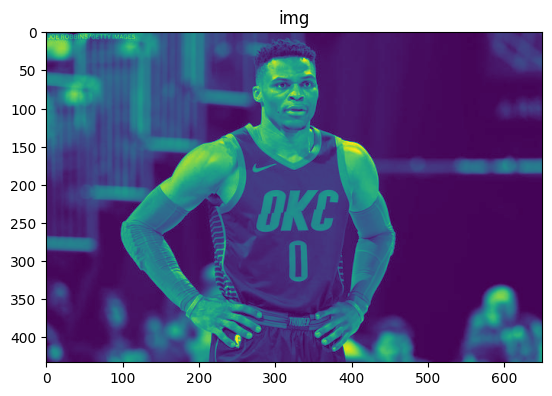

In [10]:
img = cv.imread('westbrook.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read,check with os.path.exists()"
rows,cols = img.shape

#cols-1 and rows-1 are the coordinate limits
'''
这一行代码使用OpenCV的cv.getRotationMatrix2D()函数创建一个旋转变换矩阵M。
((cols-1)/2.0, (rows-1)/2.0)：这是旋转中心的坐标，通常设置为图像中心。cols 和 rows 分别是图像的列数和行数，((cols-1)/2.0, (rows-1)/2.0) 计算出了图像的中心坐标。
90：这是旋转的角度，以度为单位。在这里，设置为90度，表示顺时针旋转90度。
1：这是缩放因子，表示不对图像进行缩放。
'''
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)

'''
这一行代码使用OpenCV的cv.warpAffine()函数将图像img进行仿射变换，使用之前创建的旋转变换矩阵M。
(cols, rows)：这是输出图像的大小，通常设置为与原始图像相同的大小。
结果将存储在变量dst中，这是旋转后的图像。
'''
dst = cv.warpAffine(img,M,(cols,rows))

# cv.imshow('img',dst)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(img)
plt.title('img')

Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

Check the below example, and also look at the points I selected (which are marked in green color):

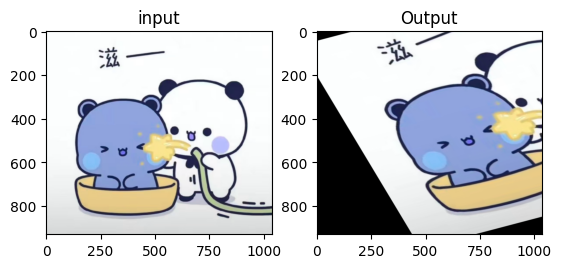

In [9]:
import matplotlib.pyplot as plt
img = cv.imread('bubu.jpg')
assert img is not None,"file could not be read"
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()



Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function cv.getPerspectiveTransform. Then apply cv.warpPerspective with this 3x3 transformation matrix.

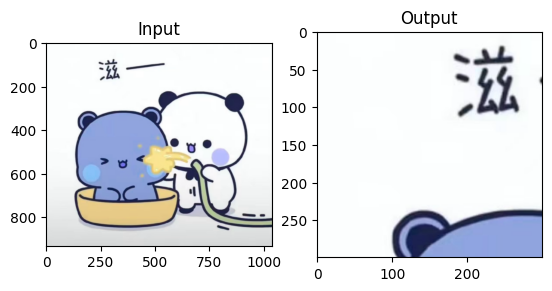

In [14]:
img = cv.imread('bubu.jpg')
assert img is not None,"file could not be read"
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst=  cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


Goal
In this tutorial, you will learn simple thresholding, adaptive thresholding and Otsu's thresholding.
You will learn the functions cv.threshold and cv.adaptiveThreshold.
Simple Thresholding

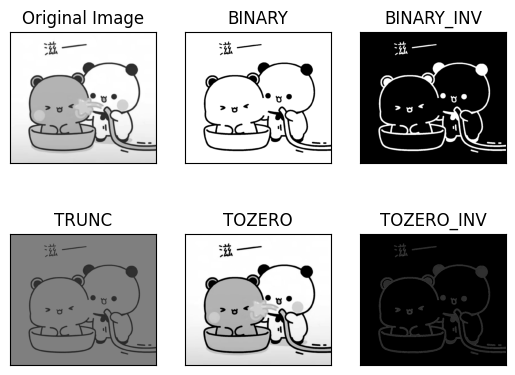

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('bubu.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

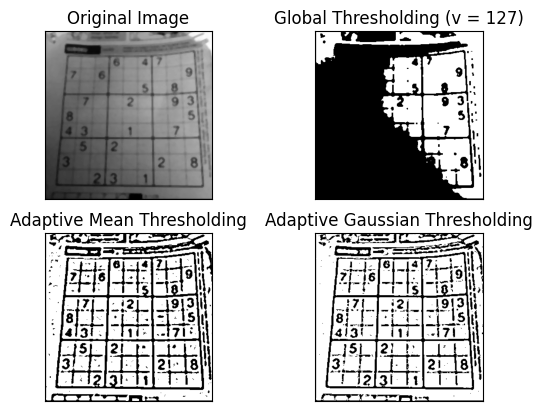

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('shudu.png',0)
assert img is not None,"file could not read"
'''
cv.medianBlur()函数用于应用中值模糊（Median Blur）滤波器来处理图像。
img是输入的图像，它是要进行模糊处理的图像数据。
5是滤波器的内核大小（kernel size）。这个参数决定了模糊的程度。在这里，内核大小为5x5，表示对图像的每个像素周围的5x5邻域像素值进行排序并取中值。中值模糊是一种非线性滤波方法，通常用于去除图像中的椒盐噪声或其他类型的噪声，同时保留图像的边缘特征。
这段代码的作用是对变量img中的图像应用中值模糊滤波，以平滑图像并减少图像中的噪声。中值模糊对于保留图像的边缘信息而不过度模糊非常有用，因此在图像处理中经常被用于预处理步骤。处理后的图像将存储在同一变量img中，以便后续分析或显示。
'''
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# plt.imshow(img)
# plt.imshow(th1)

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('noise.png',cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read ,check with os.path.exists()"

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.ThresholdTypes)

# otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


